In [2]:
import zipfile

# Replace with your actual uploaded filename
zip_filename = "archive (1).zip"

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall("linkedin_dataset")  # Extracts to a folder

print("Files extracted successfully.")


Files extracted successfully.


In [3]:
import os

# List the extracted CSV files
print(os.listdir("linkedin_dataset"))


['job_skills.csv', 'job_summary.csv', 'linkedin_job_postings.csv']


In [4]:
import pandas as pd

# Load datasets
postings_df = pd.read_csv("linkedin_dataset/linkedin_job_postings.csv")
skills_df = pd.read_csv("linkedin_dataset/job_skills.csv")
summary_df = pd.read_csv("linkedin_dataset/job_summary.csv")

# Display first few rows to confirm
print("Job Postings:")
print(postings_df.head())

print("\nJob Skills:")
print(skills_df.head())

print("\nJob Summary:")
print(summary_df.head())


Job Postings:
                                            job_link  \
0  https://www.linkedin.com/jobs/view/account-exe...   
1  https://www.linkedin.com/jobs/view/registered-...   
2  https://www.linkedin.com/jobs/view/restaurant-...   
3  https://www.linkedin.com/jobs/view/independent...   
4  https://www.linkedin.com/jobs/view/group-unit-...   

             last_processed_time got_summary got_ner is_being_worked  \
0   2024-01-21 07:12:29.00256+00           t       t               f   
1   2024-01-21 07:39:58.88137+00           t       t               f   
2  2024-01-21 07:40:00.251126+00           t       t               f   
3  2024-01-21 07:40:00.308133+00           t       t               f   
4  2024-01-19 09:45:09.215838+00           f       f               f   

                                           job_title  \
0  Account Executive - Dispensing (NorCal/Norther...   
1                 Registered Nurse - RN Care Manager   
2               RESTAURANT SUPERVISOR - THE FORK

In [6]:
# Shape and missing data
print("Postings:", postings_df.shape)
print("Skills:", skills_df.shape)
print("Summary:", summary_df.shape)

print("\nMissing values in postings:")
print(postings_df.isnull().sum())


Postings: (1348454, 14)
Skills: (1296381, 2)
Summary: (1297332, 2)

Missing values in postings:
job_link                0
last_processed_time     0
got_summary             0
got_ner                 0
is_being_worked         0
job_title               0
company                11
job_location           19
first_seen              0
search_city             0
search_country          0
search_position         0
job_level               0
job_type                0
dtype: int64


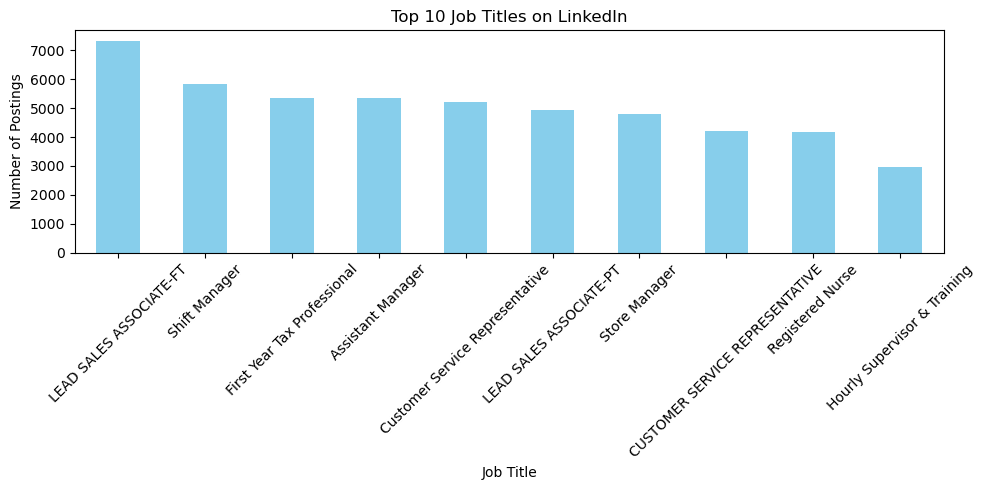

In [7]:
import matplotlib.pyplot as plt

top_titles = postings_df['job_title'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_titles.plot(kind='bar', color='skyblue')
plt.title("Top 10 Job Titles on LinkedIn")
plt.xlabel("Job Title")
plt.ylabel("Number of Postings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


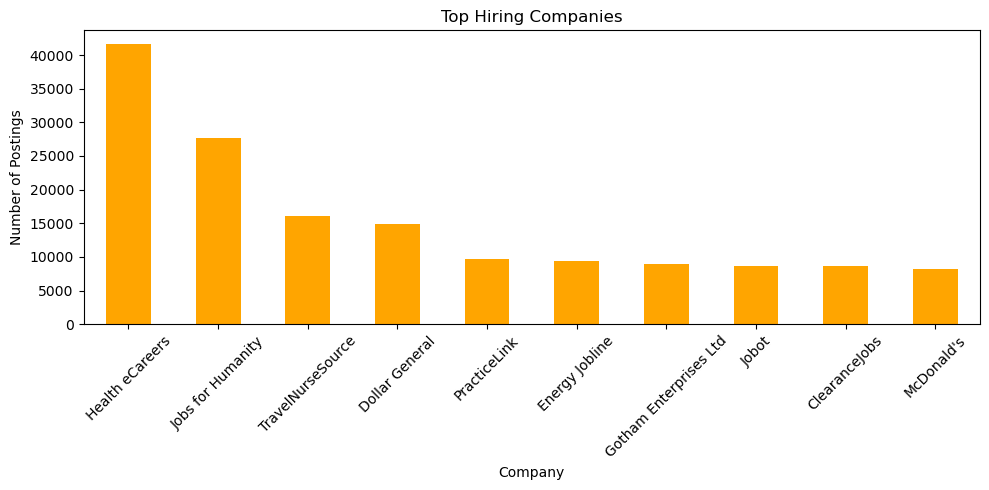

In [8]:
top_companies = postings_df['company'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_companies.plot(kind='bar', color='orange')
plt.title("Top Hiring Companies")
plt.xlabel("Company")
plt.ylabel("Number of Postings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


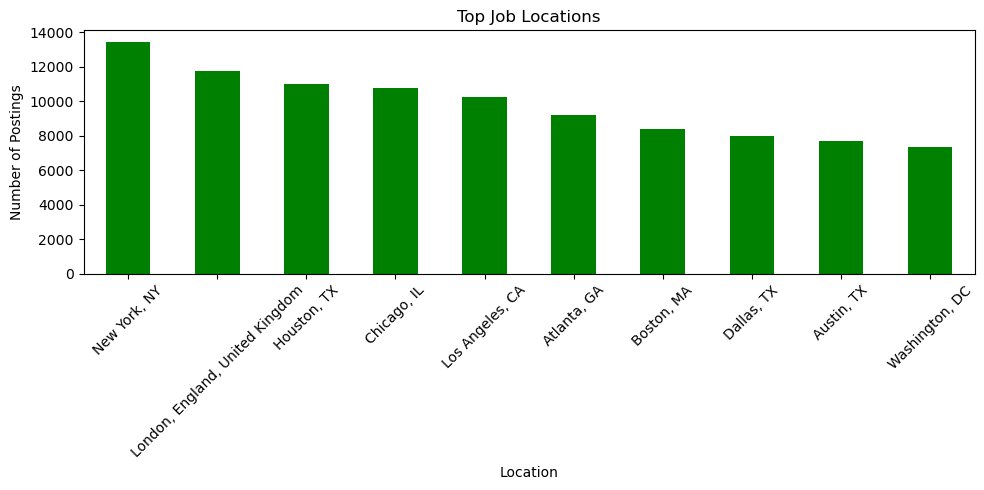

In [9]:
top_locations = postings_df['job_location'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_locations.plot(kind='bar', color='green')
plt.title("Top Job Locations")
plt.xlabel("Location")
plt.ylabel("Number of Postings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
print("Job Postings Columns:")
print(postings_df.columns)

print("\nJob Skills Columns:")
print(skills_df.columns)

print("\nJob Summary Columns:")
print(summary_df.columns)
#to see the common col between them 

Job Postings Columns:
Index(['job_link', 'last_processed_time', 'got_summary', 'got_ner',
       'is_being_worked', 'job_title', 'company', 'job_location', 'first_seen',
       'search_city', 'search_country', 'search_position', 'job_level',
       'job_type'],
      dtype='object')

Job Skills Columns:
Index(['job_link', 'job_skills'], dtype='object')

Job Summary Columns:
Index(['job_link', 'job_summary'], dtype='object')


In [11]:
# Merge job_postings with job_skills
merged_df = pd.merge(postings_df, skills_df, on='job_link', how='left')

# Merge with job_summary
merged_df = pd.merge(merged_df, summary_df, on='job_link', how='left')

# Preview the final merged dataset
merged_df.head()


,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,job_summary
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite,"Medical equipment sales, Key competitors, Term...",Responsibilities\nJob Description Summary\nJob...
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite,"Nursing, Bachelor of Science in Nursing, Maste...",Employment Type:\nFull time\nShift:\nDescripti...
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite,"Restaurant Operations Management, Inventory Ma...",Job Details\nDescription\nWhat You'll Do\nAs a...
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite,"Real Estate, Customer Service, Sales, Negotiat...",Who We Are\nRand Realty is a family-owned brok...
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite,NaN,NaN


In [13]:
merged_df.isnull().sum()


job_link                   0
last_processed_time        0
got_summary                0
got_ner                    0
is_being_worked            0
job_title                  0
company                   11
job_location              19
first_seen                 0
search_city                0
search_country             0
search_position            0
job_level                  0
job_type                   0
job_skills             54108
job_summary            51122
dtype: int64

In [ ]:
merged_df.dropna(inplace=True)  # or fillna("Unknown")
#filling missing values 

In [14]:
merged_df.columns


Index(['job_link', 'last_processed_time', 'got_summary', 'got_ner',
       'is_being_worked', 'job_title', 'company', 'job_location', 'first_seen',
       'search_city', 'search_country', 'search_position', 'job_level',
       'job_type', 'job_skills', 'job_summary'],
      dtype='object')

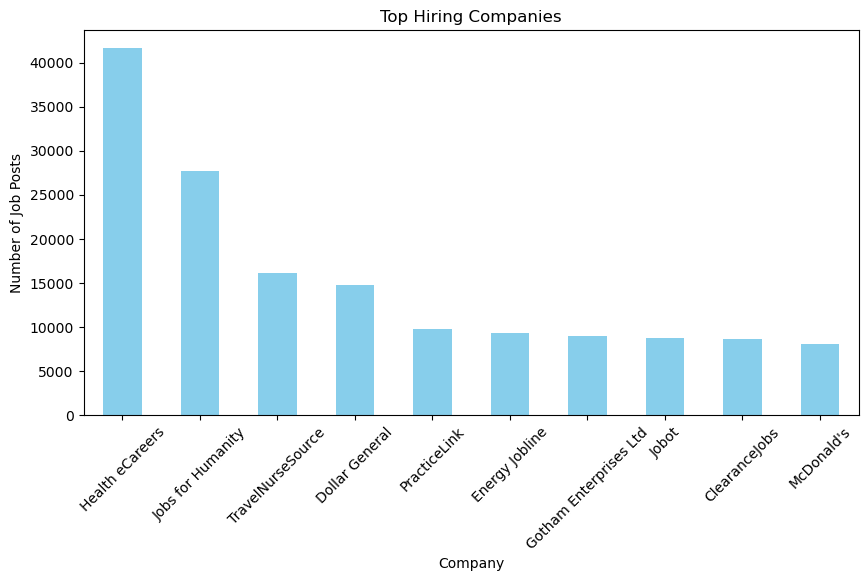

In [15]:
import matplotlib.pyplot as plt

merged_df['company'].value_counts().head(10).plot(kind='bar', figsize=(10, 5), color='skyblue', title='Top Hiring Companies')
plt.xlabel("Company")
plt.ylabel("Number of Job Posts")
plt.xticks(rotation=45)
plt.show()
# DISPLAYING THE TOP HIRING COMPANIES 

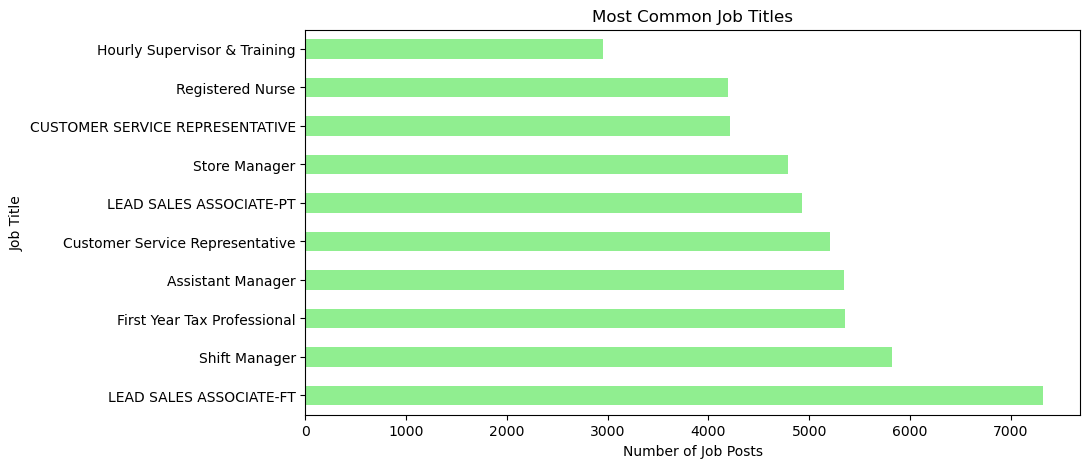

In [16]:
merged_df['job_title'].value_counts().head(10).plot(kind='barh', figsize=(10, 5), color='lightgreen', title='Most Common Job Titles')
plt.xlabel("Number of Job Posts")
plt.ylabel("Job Title")
plt.show()
# MOST IN DEMAND JOB TITLES 

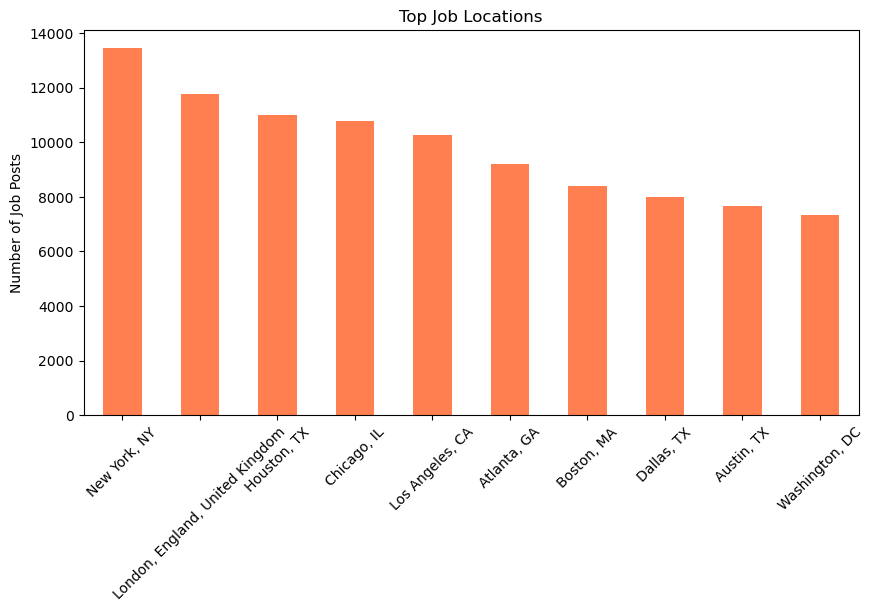

In [17]:
merged_df['job_location'].value_counts().head(10).plot(kind='bar', figsize=(10, 5), color='coral', title='Top Job Locations')
plt.ylabel("Number of Job Posts")
plt.xticks(rotation=45)
plt.show()
# TOP JOB LOCATIONS 

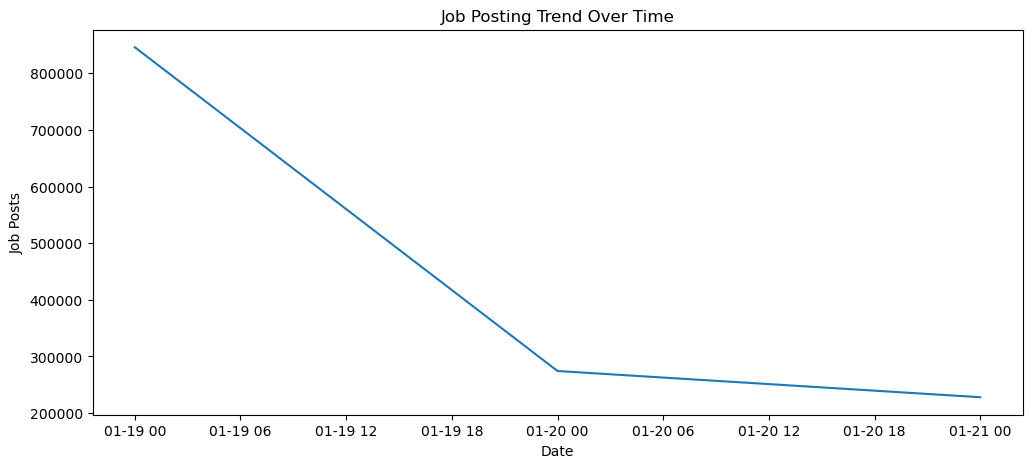

In [19]:
if 'last_processed_time' in merged_df.columns:
    merged_df['last_processed_time'] = pd.to_datetime(merged_df['last_processed_time'], errors='coerce')
    merged_df['last_processed_time'].dt.date.value_counts().sort_index().plot(figsize=(12, 5), title='Job Posting Trend Over Time')
    plt.xlabel("Date")
    plt.ylabel("Job Posts")
    plt.show()
#JOB POSTING TREND OVER TIME 

In [23]:
merged_df.to_csv("linkedin_job_analysis_final.csv", index=False)
# FINAL MERGED TO CSV FILE SAVING 